In [395]:
import pandas as pd

nursing_home_import = pd.read_csv('nursing_home_compare/Provider_Info.csv')

In [396]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Always make it pretty.
plt.style.use('ggplot')

In [397]:
nursing_home_import.head(2)

,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Provider Phone Number,Provider SSA County Code,Provider County Name,Ownership Type,...,Rating Cycle 3 Total Health Score,Total Weighted Health Survey Score,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,Location,Processing Date
0,015019,MERRY WOOD LODGE CARE AND REHABILITATION CENTER,P O BOX 130,ELMORE,AL,36025,3345678484,250,Elmore,For profit - Corporation,...,16,291.667,1,2,1,78677.0,0,1,130 ELMORE AL 36025,08/01/2019
1,015075,SUMMERFORD NURSING HOME INC,4087 HIGHWAY 31 SOUTHWEST,FALKVILLE,AL,35622,2567845275,510,Morgan,For profit - Corporation,...,401,72.167,0,1,1,13408.0,0,1,"4087 HIGHWAY FALKVILLE, AL 35622",08/01/2019


In [398]:
# for idx, column in enumerate(list(nursing_home_import.columns)):
#     print (idx, column)

In [399]:
nursing_home_import.fillna(0)
#nursing_home_import.dtypes 

nursing_home_2 = nursing_home_import.replace('.', 0)
nursing_home_2.head(2)

,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Provider Phone Number,Provider SSA County Code,Provider County Name,Ownership Type,...,Rating Cycle 3 Total Health Score,Total Weighted Health Survey Score,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,Location,Processing Date
0,015019,MERRY WOOD LODGE CARE AND REHABILITATION CENTER,P O BOX 130,ELMORE,AL,36025,3345678484,250,Elmore,For profit - Corporation,...,16,291.667,1,2,1,78677.0,0,1,130 ELMORE AL 36025,08/01/2019
1,015075,SUMMERFORD NURSING HOME INC,4087 HIGHWAY 31 SOUTHWEST,FALKVILLE,AL,35622,2567845275,510,Morgan,For profit - Corporation,...,401,72.167,0,1,1,13408.0,0,1,"4087 HIGHWAY FALKVILLE, AL 35622",08/01/2019


In [400]:
#change data types
nursing_home_2['Rating Cycle 2 Number of Standard Health Deficiencies'] = pd.to_numeric(nursing_home_2['Rating Cycle 2 Number of Standard Health Deficiencies'])
nursing_home_2['Rating Cycle 2 Total Number of Health Deficiencies'] = pd.to_numeric(nursing_home_2['Rating Cycle 2 Total Number of Health Deficiencies'])
nursing_home_2['Rating Cycle 3 Total Number of Health Deficiencies'] = pd.to_numeric(nursing_home_2['Rating Cycle 3 Total Number of Health Deficiencies'])
nursing_home_2['Rating Cycle 3 Number of Standard Health Deficiencies'] = pd.to_numeric(nursing_home_2['Rating Cycle 3 Number of Standard Health Deficiencies'])
nursing_home_2['Rating Cycle 3 Number of Health Revisits'] = pd.to_numeric(nursing_home_2['Rating Cycle 3 Number of Health Revisits'])
nursing_home_2['Rating Cycle 3 Number of Complaint Health Deficiencies'] = pd.to_numeric(nursing_home_2['Rating Cycle 3 Number of Complaint Health Deficiencies'])
nursing_home_2['Rating Cycle 3 Health Deficiency Score'] = pd.to_numeric(nursing_home_2['Rating Cycle 3 Health Deficiency Score'])
nursing_home_2['Rating Cycle 3 Health Revisit Score'] = pd.to_numeric(nursing_home_2['Rating Cycle 3 Health Revisit Score'])
nursing_home_2['Rating Cycle 3 Total Health Score'] = pd.to_numeric(nursing_home_2['Rating Cycle 3 Total Health Score'])



#nursing_home_2.dtypes 


In [401]:
#add rating from all cycles together 

nursing_home_2['Total Number of Health Deficiencies'] = (
        nursing_home_2['Rating Cycle 1 Total Number of Health Deficiencies'] 
        + nursing_home_2['Rating Cycle 2 Total Number of Health Deficiencies'] 
        + nursing_home_2['Rating Cycle 3 Total Number of Health Deficiencies'])
        
nursing_home_2['Total Number of Standard Health Deficiencies'] = (
        nursing_home_2['Rating Cycle 1 Number of Standard Health Deficiencies'] 
        + nursing_home_2['Rating Cycle 2 Number of Standard Health Deficiencies'] 
        + nursing_home_2['Rating Cycle 3 Number of Standard Health Deficiencies'])

nursing_home_2['Total Number of Complaint Health Deficiencies'] = (
    nursing_home_2['Rating Cycle 1 Number of Complaint Health Deficiencies'] 
    + nursing_home_2['Rating Cycle 2 Number of Complaint Health Deficiencies'] 
    + nursing_home_2['Rating Cycle 3 Number of Complaint Health Deficiencies'])

nursing_home_2['Total Health Deficiency Score'] = (
    nursing_home_2['Rating Cycle 1 Health Deficiency Score'] 
    + nursing_home_2['Rating Cycle 2 Health Deficiency Score'] 
    + nursing_home_2['Rating Cycle 3 Health Deficiency Score'])

nursing_home_2['Total Number of Health Revisits'] = (
    nursing_home_2['Rating Cycle 1 Number of Health Revisits'] 
    + nursing_home_2['Rating Cycle 2 Number of Health Revisits'] 
    + nursing_home_2['Rating Cycle 3 Number of Health Revisits'])

nursing_home_2['Total Health Revisit Score'] = (
    nursing_home_2['Rating Cycle 1 Health Revisit Score'] 
    + nursing_home_2['Rating Cycle 2 Health Revisit Score'] 
    + nursing_home_2['Rating Cycle 3 Health Revisit Score'])

nursing_home_2['Total Health Score'] = (
    nursing_home_2['Rating Cycle 1 Total Health Score'] 
    + nursing_home_2['Rating Cycle 2 Total Health Score'] 
    + nursing_home_2['Rating Cycle 3 Total Health Score'])


In [402]:
nursing_home_columns = nursing_home_2.loc[:, [
 'Provider Name',
 'Provider City',
 'Provider State',
 'Provider Zip Code',
 'Provider SSA County Code',
 'Provider County Name',
 'Number of Certified Beds',
 'Average Number of Residents Per Day',
 'Date First Approved to Provide Medicare and Medicaid services',
 'Overall Rating',
 'Health Inspection Rating',
 'QM Rating',
 'Long-Stay QM Rating',
 'Short-Stay QM Rating',
 'Staffing Rating',
 'RN Staffing Rating',
 'Reported Nurse Aide Staffing Hours per Resident per Day',
 'Reported LPN Staffing Hours per Resident per Day',
 'Reported RN Staffing Hours per Resident per Day',
 'Reported Licensed Staffing Hours per Resident per Day',
 'Reported Total Nurse Staffing Hours per Resident per Day',
 'Reported Physical Therapist Staffing Hours per Resident Per Day',
 'Case-Mix Nurse Aide Staffing Hours per Resident per Day',
 'Case-Mix LPN Staffing Hours per Resident per Day',
 'Case-Mix RN Staffing Hours per Resident per Day',
 'Case-Mix Total Nurse Staffing Hours per Resident per Day',
 'Adjusted Nurse Aide Staffing Hours per Resident per Day',
 'Adjusted LPN Staffing Hours per Resident per Day',
 'Adjusted RN Staffing Hours per Resident per Day',
 'Adjusted Total Nurse Staffing Hours per Resident per Day',
 'Total Number of Health Deficiencies',
 'Total Number of Standard Health Deficiencies',
 'Total Number of Complaint Health Deficiencies',
 'Total Health Deficiency Score',
 'Total Number of Health Revisits',
 'Total Health Revisit Score',
 'Total Health Score',
 'Total Weighted Health Survey Score',
 'Number of Facility Reported Incidents',
 'Number of Substantiated Complaints',
 'Number of Fines',
 'Total Amount of Fines in Dollars',
 'Number of Payment Denials',
 'Total Number of Penalties']]

nursing_home_columns.head(2)

,Provider Name,Provider City,Provider State,Provider Zip Code,Provider SSA County Code,Provider County Name,Number of Certified Beds,Average Number of Residents Per Day,Date First Approved to Provide Medicare and Medicaid services,Overall Rating,...,Total Number of Health Revisits,Total Health Revisit Score,Total Health Score,Total Weighted Health Survey Score,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties
0,MERRY WOOD LODGE CARE AND REHABILITATION CENTER,ELMORE,AL,36025,250,Elmore,124,98.5,01/01/1974,1.0,...,18.0,0.0,602.0,291.667,1,2,1,78677.0,0,1
1,SUMMERFORD NURSING HOME INC,FALKVILLE,AL,35622,510,Morgan,216,200.0,04/19/1967,1.0,...,402.0,0.0,417.0,72.167,0,1,1,13408.0,0,1


In [403]:
overall_rating_mean = nursing_home_columns.groupby(nursing_home_columns['Provider State']).mean()['Overall Rating'].reset_index()
#means of overall states
#overall_rating_mean

<BarContainer object of 53 artists>

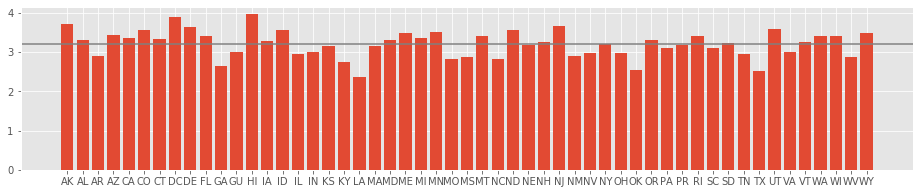

In [404]:
fig, ax = plt.subplots(figsize = (16,3) )
overall_mean = overall_rating_mean.iloc[:, 1].mean()
ax.axhline(overall_mean, c='grey')
ax.bar(overall_rating_mean.iloc[:, 0], overall_rating_mean.iloc[:, 1])

#bar plot to show show overall rating means by state


In [405]:
# census_import = pd.read_csv('census.csv')
# census_import.head(2)


# for idx, column in enumerate(list(census_import.columns)):
#     print (idx, column)
    
    
# census_remove_columns = census_import.iloc[:, [1, 5, 75, 77, 79, 213, 357, 359, 361, 379]]
# census_remove_columns.head(2)


# # for idx, column in enumerate(list(census_remove_columns.columns)):
# #     print (idx, column)


# census_keys = [i for i in list(census_remove_columns.columns)]
# census_values = ['county', '65 gross median rent', 'high school 25yrs', 'some college 25yrs', 'bachelors 25yrs', '65 total population', '65 estimated income', '65 estimated income with social security', '65 social security income mean', '65 poverty status']
# census_dict = dict(zip(census_keys, census_values))
# census_rename = census_remove_columns.rename(columns=census_dict)
# census_rename.head(2)


# #add separate column of state abbreviations
# us_state_abbrev = {
#     'Alabama': 'AL',
#     'Alaska': 'AK',
#     'Arizona': 'AZ',
#     'Arkansas': 'AR',
#     'California': 'CA',
#     'Colorado': 'CO',
#     'Connecticut': 'CT',
#     'Delaware': 'DE',
#     'District of Columbia': 'DC',
#     'Florida': 'FL',
#     'Georgia': 'GA',
#     'Hawaii': 'HI',
#     'Idaho': 'ID',
#     'Illinois': 'IL',
#     'Indiana': 'IN',
#     'Iowa': 'IA',
#     'Kansas': 'KS',
#     'Kentucky': 'KY',
#     'Louisiana': 'LA',
#     'Maine': 'ME',
#     'Maryland': 'MD',
#     'Massachusetts': 'MA',
#     'Michigan': 'MI',
#     'Minnesota': 'MN',
#     'Mississippi': 'MS',
#     'Missouri': 'MO',
#     'Montana': 'MT',
#     'Nebraska': 'NE',
#     'Nevada': 'NV',
#     'New Hampshire': 'NH',
#     'New Jersey': 'NJ',
#     'New Mexico': 'NM',
#     'New York': 'NY',
#     'North Carolina': 'NC',
#     'North Dakota': 'ND',
#     'Northern Mariana Islands':'MP',
#     'Ohio': 'OH',
#     'Oklahoma': 'OK',
#     'Oregon': 'OR',
#     'Palau': 'PW',
#     'Pennsylvania': 'PA',
#     'Puerto Rico': 'PR',
#     'Rhode Island': 'RI',
#     'South Carolina': 'SC',
#     'South Dakota': 'SD',
#     'Tennessee': 'TN',
#     'Texas': 'TX',
#     'Utah': 'UT',
#     'Vermont': 'VT',
#     'Virgin Islands': 'VI',
#     'Virginia': 'VA',
#     'Washington': 'WA',
#     'West Virginia': 'WV',
#     'Wisconsin': 'WI',
#     'Wyoming': 'WY',
# }


# census_rename['State'] = census_rename['county'].str.split('County, ', expand=True)[1].map(us_state_abbrev)

# census_rename.head(1)



# census_median_rent = census_rename.groupby(census_rename['State']).mean()['65 gross median rent'].reset_index()
# census_median_rent






In [406]:
state_census_import = pd.read_csv('state_census.csv')
state_census_import.head(2)



,id,Geographic Area Name,65 years and over!!Margin of Error!!Renter-occupied housing units!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!Less than 30 percent,65 years and over!!Estimate!!Renter-occupied housing units!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!30 percent or more,65 years and over!!Margin of Error!!Renter-occupied housing units!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!30 percent or more,65 years and over!!Estimate!!GROSS RENT!!Median gross rent (dollars),65 years and over!!Margin of Error!!GROSS RENT!!Median gross rent (dollars),Total!!Estimate!!Total population,Total!!Margin of Error!!Total population,Total!!Estimate!!SEX AND AGE!!Male,...,65 years and over!!Margin of Error!!OWNER CHARACTERISTICS!!Median selected monthly owner costs with a mortgage (dollars),65 years and over!!Estimate!!OWNER CHARACTERISTICS!!Median selected monthly owner costs without a mortgage (dollars),65 years and over!!Margin of Error!!OWNER CHARACTERISTICS!!Median selected monthly owner costs without a mortgage (dollars),65 years and over!!Estimate!!Renter-occupied housing units,65 years and over!!Margin of Error!!Renter-occupied housing units,65 years and over!!Estimate!!Renter-occupied housing units!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!Less than 30 percent,Unnamed: 414,Unnamed: 415,Unnamed: 416,Unnamed: 417
0,0400000US01,Alabama,2.6,42.4,2.6,619.0,22.0,4874747.0,*****,48.4,...,0.9,139200.0,3457.0,1024.0,23.0,332.0,6.0,85284.0,3712.0,57.6
1,0400000US02,Alaska,7.7,47.2,7.7,827.0,76.0,739795.0,*****,52.1,...,2.6,276800.0,13123.0,1605.0,78.0,556.0,23.0,9306.0,1250.0,52.8


In [419]:
# for idx, column in enumerate(list(state_census_import.columns)):
#     print (idx, column)

In [413]:
    
state_census_drop_columns = state_census_import.iloc[:, [1, 3, 75, 79, 213, 357, 359, 378]]



state_census_drop_columns.head(2)


state_census_keys = [i for i in list(state_census_drop_columns.columns)]
state_census_values = ['Geographic Area Name', 'Gross Rent Percentage to Income', 'HS Grad (25yrs)', 
          'College Grad (25yrs)', '65+ population', 'Income With Earnings', 'Income with Social Security', 
          '65+ poverty status' ]
state_census_dict = dict(zip(state_census_keys, state_census_values))
state_census_rename = state_census_drop_columns.rename(columns=state_census_dict)
state_census_rename.head(2)

,Geographic Area Name,Gross Rent Percentage to Income,HS Grad (25yrs),College Grad (25yrs),65+ population,Income With Earnings,Income with Social Security,65+ poverty status
0,Alabama,42.4,31.1,25.5,750.0,501551.0,32.9,967.0
1,Alaska,47.2,27.6,28.8,1201.0,48939.0,46.2,3970.0


In [416]:

#add separate column of state abbreviations
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Palau': 'PW',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

def abbrev(x):
    return us_state_abbrev[x]

state_census_rename['State'] = state_census_rename['Geographic Area Name'].map(lambda x: abbrev(x))

state_census_rename.head(1)

,Geographic Area Name,Gross Rent Percentage to Income,HS Grad (25yrs),College Grad (25yrs),65+ population,Income With Earnings,Income with Social Security,65+ poverty status,State
0,Alabama,42.4,31.1,25.5,750.0,501551.0,32.9,967.0,AL


In [428]:
state_census_mean_income = state_census_rename.groupby(state_census_rename['State']).mean()['Income With Earnings'].reset_index()
state_census_mean_income.head(10)


,State,Income With Earnings
0,AK,48939.0
1,AL,501551.0
2,AR,305494.0
3,AZ,717344.0
4,CA,3101384.0
5,CO,480099.0
6,CT,361638.0
7,DC,55731.0
8,DE,101597.0
9,FL,2436565.0


<BarContainer object of 52 artists>

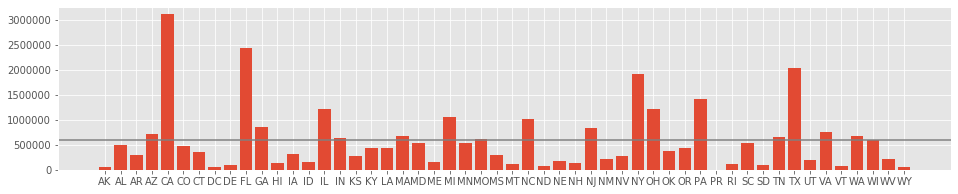

In [427]:

fig, ax = plt.subplots(figsize = (16,3) )
income_mean = state_census_mean_income.mean()['Income With Earnings']
ax.axhline(income_mean, c='grey')
ax.bar(state_census_mean_income.iloc[:, 0], state_census_mean_income.iloc[:, 1])

